<p style="font-size: 20px; margin-bottom: 3px; margin-top: 3px;">By: Ayushman Anupam</p>  
<p style="font-size: 20px; margin-top: 3px;">GitHub Link: <a href="https://github.com/AyushmanGHub">https://github.com/AyushmanGHub</a></p>

### Topic for Project: Customer Segmentation Using Clustering Algorithms
<div style="text-align: center;">
  <span style="color: #4A90E2; font-size: 35px; font-weight: bold;">ClusterCart : Unveiling Customer through Data</span>
  <hr style="border: 1px dashed grey; width: 80%;"/>
</div>


## <span style="color: #4A90E2">Introduction</span>
<hr style="border: 1px solid Grey;"/>


**Introduction to the Project**  

In this project, we aim to segment customers based on their purchasing behavior using the K-Means clustering algorithm. Customer segmentation is a critical strategy for businesses to better understand their clientele, identify distinct groups, and personalize marketing and sales strategies. By uncovering patterns within customer data, businesses can enhance customer satisfaction, improve product recommendations, and boost overall profitability.  

The dataset used for this project represents customer information, which could include purchasing patterns, demographic data, or other relevant features typically available in an e-commerce or retail context.  

To accomplish this task, we utilized the following approach:  
1. **Data Analysis:** leveraged Pandas for efficient data cleaning, preprocessing, and exploratory analysis to ensure the dataset was ready for clustering.  
2. **Clustering Algorithm:** K-Means, a robust and widely used clustering technique, was implemented to group customers into meaningful clusters based on their behavioral or demographic similarities.  
3. **Dimensionality Reduction:** Principal Component Analysis (PCA) was applied to reduce the dimensionality of the data, making it easier to visualize and interpret the clusters without losing critical information.  
4. **Visualization:** Advanced visualization tools such as Plotly were employed to create dynamic and interactive plots for analyzing the clusters and providing a clear understanding of the segmentation results.  

The primary goal of this project was to identify customer groups that share similar characteristics. These insights can empower businesses to target specific segments with tailored marketing campaigns, optimize product offerings, and improve customer retention strategies. By integrating K-Means clustering with data analysis and visualization, this project demonstrates the power of data-driven customer segmentation in modern business strategies.  

### ---------------------------------------  Importing Needed Libraries --------------------------------------


In [1]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.special import softmax

# ------------------- Data Cleaning & Preprocessing ---------------------

**About the Dataset**  

The dataset used in this project, titled **Online Retail**, is publicly available from the UCI Machine Learning Repository. It contains transactional data from an e-commerce business that operates in the United Kingdom. The data provides a detailed record of customer purchases, offering valuable insights into purchasing behavior. You can refer dataset to its source on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/352/online+retail).  

In [19]:
df = pd.read_excel(r"Online Retail.xlsx")
data_cleaned = df.drop(columns=['InvoiceNo', 'Description', 'InvoiceDate',"UnitPrice"])

### -------- Pivoting and Encoding  ---------

In [3]:
# Grouping by CustomerID and pivot the data
encoded_df = df.pivot_table(
    index=["CustomerID", "Country"], 
    columns="StockCode", 
    values="Quantity", 
    aggfunc="sum",
    fill_value=0  # Replace NaN with 0
).reset_index() 

# one-hot encoding for the 'Country' column and ensure integers
country_encoded = pd.get_dummies(encoded_df["Country"], prefix="Country").astype(int)
final_encoded_df = pd.concat([encoded_df.drop(columns=["Country"]), country_encoded], axis=1)

# ---------------------- Exploratory data Analysis -------------------------

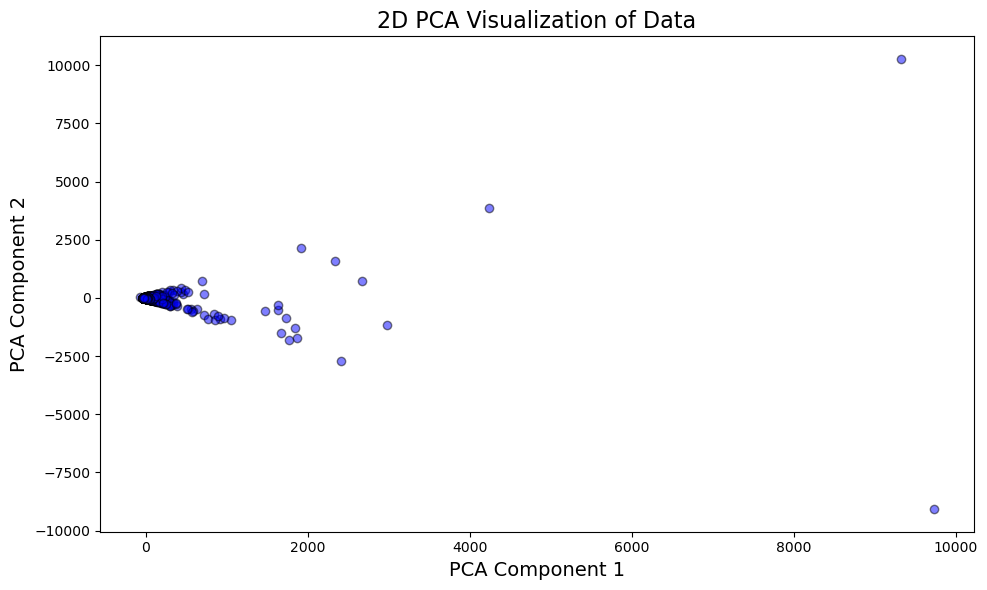

In [20]:
# 2D graph of data

final_encoded_df.columns = final_encoded_df.columns.astype(str)
X = final_encoded_df.drop(columns=["CustomerID"])

# PCA to reduce dimensions to 2 and storing
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X)
pca_df = pd.DataFrame(pca_components, columns=["PCA1", "PCA2"])

plt.figure(figsize=(10, 6))
plt.scatter(pca_df["PCA1"], pca_df["PCA2"], c='blue', edgecolor='k', alpha=0.5)
plt.title("2D PCA Visualization of Data", fontsize=16)
plt.xlabel("PCA Component 1", fontsize=14)
plt.ylabel("PCA Component 2", fontsize=14)
plt.tight_layout()
plt.show()

In [21]:
# 3D plot of data
X = final_encoded_df.drop(columns=["CustomerID"])
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X)

pca_df = pd.DataFrame(pca_components, columns=["PCA1", "PCA2"])
pca_df["CustomerID"] = final_encoded_df["CustomerID"]

fig = px.scatter_3d(pca_df, x='PCA1', y='PCA2', z='CustomerID',
                    title="3D PCA Visualization of Data",
                    labels={'PCA1': 'PCA Component 1', 'PCA2': 'PCA Component 2', 'CustomerID': 'Customer ID'})

fig.update_layout(
    scene=dict(
        xaxis_title="PCA Component 1",
        yaxis_title="PCA Component 2",
        zaxis_title="Customer ID",
        xaxis=dict(showgrid=True, zeroline=False, showline=True, linewidth=2, linecolor='black'),
        yaxis=dict(showgrid=True, zeroline=False, showline=True, linewidth=2, linecolor='black'),
        zaxis=dict(showgrid=True, zeroline=False, showline=True, linewidth=2, linecolor='black'),
        bgcolor='rgb(243, 243, 243)',  # Light background 
    ),
    margin=dict(l=0, r=0, b=0, t=40),  # margins 
    title_x=0.5,  
    title_y=0.95, 
    paper_bgcolor='white', 
    font=dict(
        family="Arial, sans-serif", 
        size=12,  
        color="black" 
    )
)
fig.show()

C:\Users\ayush\AppData\Local\Temp\ipykernel_14948\327654162.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




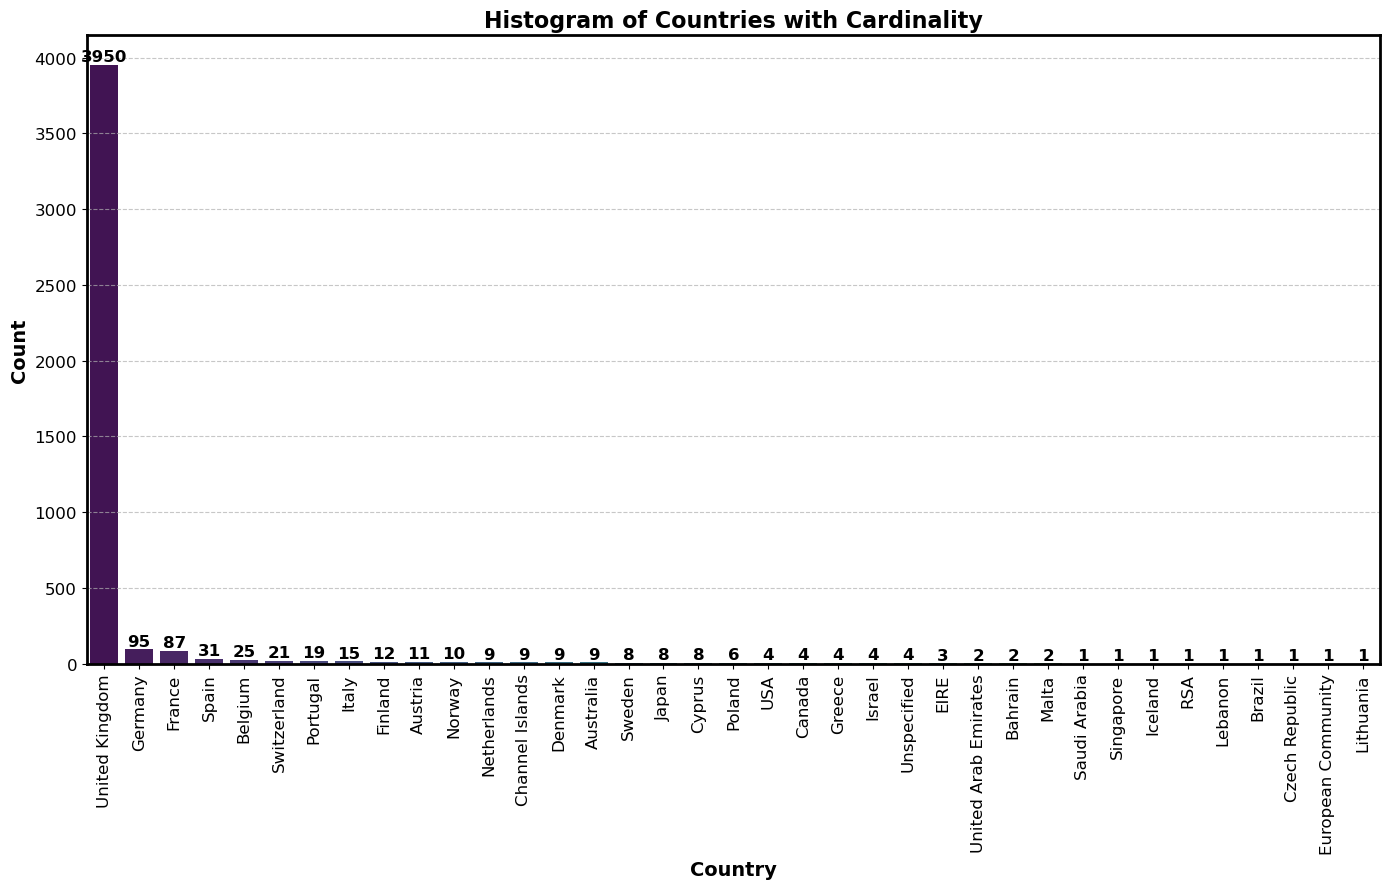

In [6]:
country_counts = encoded_df['Country'].value_counts()

# Plot the histogram (bar chart)
plt.figure(figsize=(14, 9))
sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')

# Add cardinality on top of each bar
for i, count in enumerate(country_counts.values):
    plt.text(i, count + 5, str(count), ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

plt.xlabel('Country', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.title('Histogram of Countries with Cardinality', fontsize=16, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Style the plot with borders and proper layout
plt.xticks(rotation=90, fontsize=12)  
plt.yticks(fontsize=12)
plt.tight_layout()

# Add borders to the plot for a more polished look
for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(2)
plt.show()

C:\Users\ayush\AppData\Local\Temp\ipykernel_14948\2998404703.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




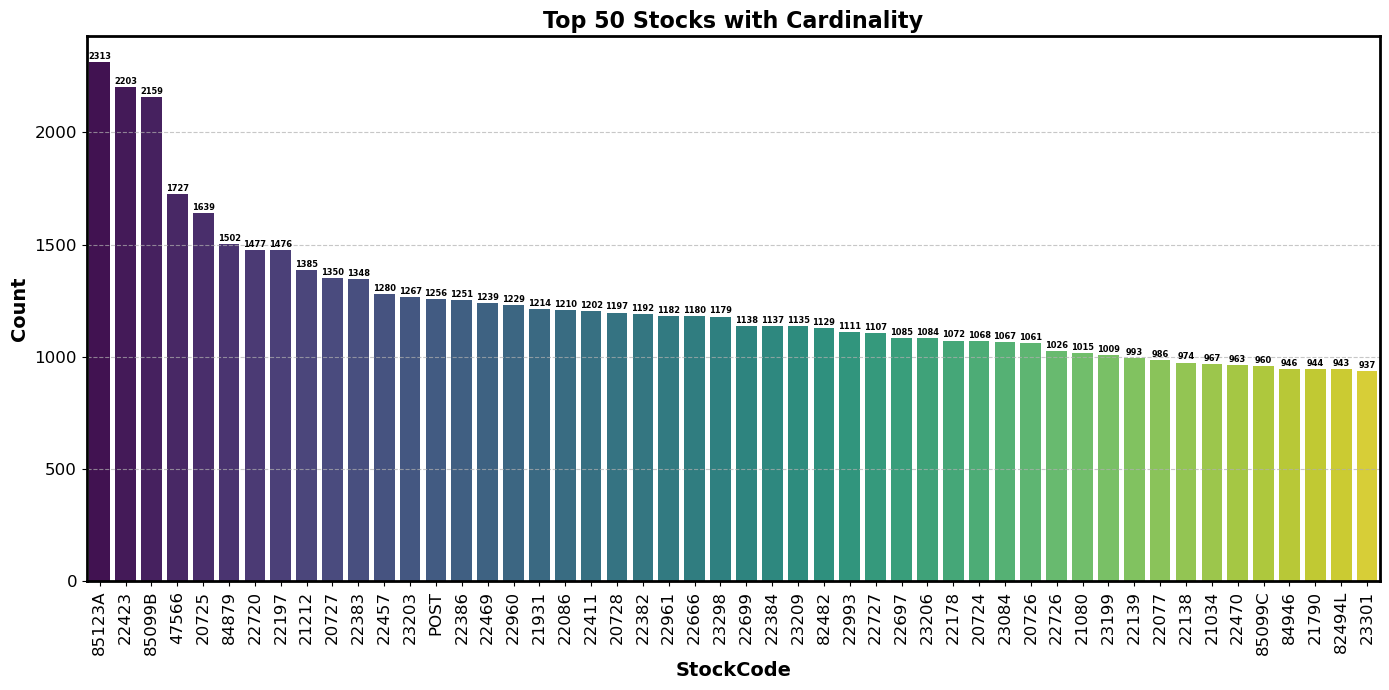

In [7]:
stockcode_counts = df['StockCode'].value_counts()
top_50_stockcodes = stockcode_counts.head(50)

plt.figure(figsize=(14, 7))
sns.barplot(x=top_50_stockcodes.index, y=top_50_stockcodes.values, palette='viridis')

# Add cardinality on top of each bar
for i, count in enumerate(top_50_stockcodes.values):
    plt.text(i, count + 5, str(count), ha='center', va='bottom', fontsize=6, color='black', fontweight='bold')

# Set labels and title
plt.xlabel('StockCode', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.title('Top 50 Stocks with Cardinality', fontsize=16, fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.xticks(rotation=90, fontsize=12) 
plt.yticks(fontsize=12)
plt.tight_layout()

for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(2)
plt.show()


# K-Means Clustering:
K-Means is a popular clustering algorithm that partitions data into k clusters. It minimizes the variance within clusters.

## -------------------  Training ----------------------

In [8]:
final_encoded_df.columns = final_encoded_df.columns.astype(str)
k = 7  #  number of clusters

kmeans = KMeans(n_clusters=k, random_state=42)
kmeans_labels = kmeans.fit_predict(final_encoded_df)

KMeans_Cluster_df = final_encoded_df.copy()
KMeans_Cluster_df.insert(1, 'KMeans_Cluster', kmeans_labels)
KMeans_Cluster_df.head()

,CustomerID,KMeans_Cluster,10002,10080,10120,10125,10133,10135,11001,15030,...,Country_RSA,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
0,12346.0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,12347.0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12348.0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,12349.0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12350.0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## --------------------------- Model Evaluation and Result ----------------------------------

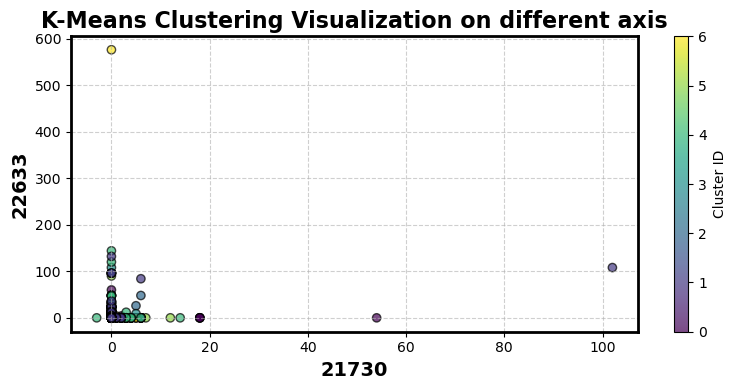

In [22]:
plt.figure(figsize=(8, 4))
scatter = plt.scatter(KMeans_Cluster_df['21730'], KMeans_Cluster_df['22633'], c=KMeans_Cluster_df['KMeans_Cluster'], cmap='viridis', edgecolor='k', alpha=0.7)

plt.colorbar(scatter, label='Cluster ID')
plt.xlabel('21730', fontsize=14, fontweight='bold')
plt.ylabel('22633', fontsize=14, fontweight='bold')
plt.title('K-Means Clustering Visualization on different axis', fontsize=16, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.6)

for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(2)
plt.tight_layout()
plt.show()

In [10]:
# Get the unique cluster labels
unique_clusters = KMeans_Cluster_df['KMeans_Cluster'].nunique()


print("\n" + "="*40)
print(f"{'Number of Clusters:':<25}{unique_clusters}")
print("="*40)

cluster_cardinality = KMeans_Cluster_df['KMeans_Cluster'].value_counts()
print("\nCardinality of each Cluster:")
print("="*40)
for cluster, count in cluster_cardinality.items():
    print(f"Cluster {cluster:<3} | Count: {count:>5}")
print("="*40)


Number of Clusters:      7

Cardinality of each Cluster:
Cluster 2   | Count:   647
Cluster 6   | Count:   638
Cluster 5   | Count:   634
Cluster 0   | Count:   628
Cluster 1   | Count:   617
Cluster 4   | Count:   609
Cluster 3   | Count:   607


In [11]:
cluster_cardinality = KMeans_Cluster_df['KMeans_Cluster'].value_counts().reset_index()
# Rename columns for better readability
cluster_cardinality.columns = ['Cluster Label', 'Number of Points']

fig = px.bar(
    cluster_cardinality,
    x='Cluster Label',
    y='Number of Points',
    title='Distribution of KMeans Clusters',
    labels={'Cluster Label': 'Cluster', 'Number of Points': 'Count'},
    color='Cluster Label',
    color_continuous_scale='Viridis',
    opacity=0.8
)

# Update layout with custom axis ranges
fig.update_layout(
    title_font_size=24,
    title_font_color='black',
    xaxis_title='Cluster Label',
    yaxis_title='Number of Points',
    xaxis_tickfont=dict(size=14),
    yaxis_tickfont=dict(size=14),
    margin=dict(l=50, r=50, t=40, b=60), 
    paper_bgcolor='white',  # White background
    plot_bgcolor='white',  # White plot area
    showlegend=False,
    yaxis=dict(range=[600, 650])  # Start y-axis at 600
)

fig.show()


In [16]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(KMeans_Cluster_df.drop(columns=["CustomerID", "KMeans_Cluster"]))

# Adding the PCA components and KMeans cluster labels back to the dataframe
pca_df = pd.DataFrame(pca_components, columns=["PCA1", "PCA2"])
pca_df['CustomerID'] = KMeans_Cluster_df['CustomerID']
pca_df['KMeans_Cluster'] = KMeans_Cluster_df['KMeans_Cluster']

#  3D scatter plot using Plotly, colored by KMeans cluster labels
fig = px.scatter_3d(pca_df, x='CustomerID', y='PCA1', z='PCA2', color='KMeans_Cluster',
                    title="3D Scatter Plot with PCA Dimensions and KMeans Clusters",
                    labels={'CustomerID': 'Customer ID', 'PCA1': 'PCA Component 1', 'PCA2': 'PCA Component 2', 'KMeans_Cluster': 'KMeans Clusters'})

fig.update_layout(
    scene=dict(
        zaxis=dict(title='Customer ID', tickfont=dict(size=12, color='black')),
        yaxis=dict(title='PCA Component 1', tickfont=dict(size=12, color='black')),
        xaxis=dict(title='PCA Component 2', tickfont=dict(size=12, color='black')),
        bgcolor='rgba(0, 0, 0, 0)',  
    ),
    title={
        'text': "3D Scatter Plot with PCA and KMeans Clusters",
        'x': 0.5,  # Center the title
        'xanchor': 'center',
        'font': {'size': 20, 'family': 'Arial', 'color': 'darkblue'}
    },
    coloraxis_colorbar=dict(
        title="Cluster", tickvals=[0, 1, 2, 3, 4], ticktext=["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4"]
    ), margin=dict(l=0, r=0, b=0, t=40)
)
fig.show()

### -------- Coordinate for each cluster centre -------

In [13]:
# Getting the cluster centroids (average feature values for each cluster)
centroids = kmeans.cluster_centers_

columns = KMeans_Cluster_df.drop(columns=['CustomerID', 'KMeans_Cluster']).columns
# Check if centroids have one extra column and remove it if needed
if centroids.shape[1] > len(columns):
    centroids = centroids[:, :-1]  # Remove the extra column
    print("Removed extra column from centroids.")

centroids_df = pd.DataFrame(centroids, columns=columns)
print("Centroids of each cluster:")
centroids_df.head()

Removed extra column from centroids.
Centroids of each cluster:


,10002,10080,10120,10125,10133,10135,11001,15030,15034,15036,...,Country_RSA,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
0,14488.469745,0.187898,0.058917,0.009554,0.197452,0.968153,0.673567,0.165605,8.326673e-17,1.054140,...,3.295975e-17,8.944668e-19,8.944668e-19,8.944668e-19,-3.035766e-17,7.155734e-18,3.816392e-17,3.577867e-18,1.788934e-18,0.984076
1,17865.952998,0.170178,0.128039,0.103728,0.329011,0.878444,0.465154,0.152350,6.969206e-02,0.802269,...,3.295975e-17,1.084202e-18,1.084202e-18,1.084202e-18,-2.949030e-17,8.673617e-18,3.816392e-17,4.336809e-18,1.620746e-03,0.993517
2,12746.279753,0.686244,0.037094,0.024730,0.942813,0.222566,0.635240,0.661515,1.004637e-01,1.652241,...,2.936631e-02,1.545595e-03,1.545595e-03,1.545595e-03,4.636785e-02,1.081917e-02,2.472952e-02,6.182380e-03,1.545595e-03,0.408037
3,16188.461285,0.049423,0.059308,0.003295,0.097199,0.481054,0.281713,0.298188,1.387779e-16,0.219110,...,3.035766e-17,1.409463e-18,1.409463e-18,1.409463e-18,-2.862294e-17,1.127570e-17,3.642919e-17,5.637851e-18,2.818926e-18,0.996705
4,17021.474548,0.093596,0.087028,0.106732,0.101806,0.545156,0.126437,0.062397,1.313629e-02,0.321839,...,9.540979e-18,7.589415e-19,7.589415e-19,7.589415e-19,1.642036e-03,1.642036e-03,2.949030e-17,3.035766e-18,1.517883e-18,0.993432


## <span style="color: #4A90E2">Results</span>
<hr style="border: 1px solid Grey;"/>

### -------- sales strategies ----------
The probabilities for each customer show the likelihood that they will buy a specific product, based on their purchasing behavior and the cluster they belong to. Higher probabilities mean a greater chance of purchase. By examining these probabilities, businesses can identify which products are likely to be bought by customers in each segment. This insight enables businesses to create **targeted marketing strategies**, offering personalized recommendations that are more relevant to each customer, ultimately enhancing engagement and increasing the chances of successful sales.

In [14]:
cluster_stats = KMeans_Cluster_df.drop(columns= "CustomerID").groupby('KMeans_Cluster').agg('mean')
# Apply softmax to each column independently
normalized_cluster_stats = cluster_stats.apply(lambda x: softmax(x), axis=0)
# Rename the mean column to "mean_probability"
normalized_cluster_stats = normalized_cluster_stats.rename(columns={col: f"mean_probability_{col}" for col in normalized_cluster_stats.columns})
print("\nNormalized Descriptive Probability for each KMeans cluster:")
normalized_cluster_stats



Normalized Descriptive Probability for each KMeans cluster (using softmax):


,mean_probability_10002,mean_probability_10080,mean_probability_10120,mean_probability_10125,mean_probability_10133,mean_probability_10135,mean_probability_11001,mean_probability_15030,mean_probability_15034,mean_probability_15036,...,mean_probability_Country_RSA,mean_probability_Country_Saudi Arabia,mean_probability_Country_Singapore,mean_probability_Country_Spain,mean_probability_Country_Sweden,mean_probability_Country_Switzerland,mean_probability_Country_USA,mean_probability_Country_United Arab Emirates,mean_probability_Country_United Kingdom,mean_probability_Country_Unspecified
KMeans_Cluster,,,,,,,,,,,,,,,,,,,,,
0,0.139685,0.141657,0.137839,0.126015,0.210436,0.177199,0.129924,0.138236,0.059512,0.000368,...,0.142826,0.142826,0.142826,0.141862,0.142602,0.142188,0.142731,0.142793,0.151903,0.142955
1,0.137232,0.151795,0.151451,0.143733,0.192380,0.143863,0.128214,0.148213,0.046261,0.000317,...,0.142826,0.142826,0.142826,0.141862,0.142602,0.142188,0.142731,0.143024,0.153344,0.142728
2,0.229921,0.138599,0.139947,0.265539,0.099843,0.170536,0.213335,0.152845,0.108231,0.178671,...,0.143047,0.143047,0.143047,0.148595,0.144153,0.145748,0.143616,0.143013,0.085388,0.143170
3,0.121622,0.141712,0.136979,0.113994,0.129293,0.119751,0.148344,0.138236,0.025820,0.000147,...,0.142826,0.142826,0.142826,0.141862,0.142602,0.142188,0.142731,0.142793,0.153834,0.142963
4,0.127115,0.145695,0.151906,0.114521,0.137853,0.102529,0.117184,0.140064,0.028613,0.818680,...,0.142826,0.142826,0.142826,0.142095,0.142836,0.142188,0.142731,0.142793,0.153331,0.142728
5,0.122714,0.136104,0.136744,0.121490,0.101894,0.165568,0.141477,0.141545,0.701019,0.001766,...,0.142826,0.142826,0.142826,0.141862,0.142602,0.143314,0.142731,0.142793,0.150495,0.142728
6,0.121711,0.144439,0.145134,0.114709,0.128302,0.120555,0.121522,0.140861,0.030544,0.000050,...,0.142826,0.142826,0.142826,0.141862,0.142602,0.142188,0.142731,0.142793,0.151703,0.142728


# --------------------------------------------------------------------------------------------